In [1]:
import pandas as pd
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Fuente de datos:
@misc{keshani jayasinghe_2020, title={Cryptojacking Attack Timeseries Dataset}, url={https://www.kaggle.com/dsv/1079823}, DOI={10.34740/KAGGLE/DSV/1079823}, publisher={Kaggle}, author={Keshani Jayasinghe}, year={2020} }

# Descripción de los datos
- cpu_guest
- cpu_guest_nice
- cpu_idle: Tiempo en que un procesado esta inactivo
- cpu_steal
- cpu_iowait es la medida del tiempo que los procesos de la CPU pasan sin hacer nada, en espera de poder hacer una operación de IO, es decir, leer o escribir en el disco.
- cpu_irq
- cpu_nice  tiempo de CPU que está actualmente "en uso"
- cpu_softirq Interrupciones
- cpu_system
- cpu_total
- cpu_user
- diskio_sda1_disk_name
- diskio_sda1_key
- diskio_sda1_read_bytes
- diskio_sda1_time_since_update
- diskio_sda1_write_bytes
- diskio_sda_disk_name
- diskio_sda_key
- diskio_sda_read_bytes
- diskio_sda_time_since_update
- diskio_sda_write_bytes
- fs_/_device_name
- fs_/_free
- fs_/_fs_type
- fs_/_key
- fs_/_mnt_point
- fs_/_percent
- fs_/_size
- fs_/_used
- load_cpucore
- load_min1
- load_min15
- load_min5
- mem_active
- mem_available
- mem_buffers
- mem_cached
- mem_free
- mem_inactive
- mem_percent
- mem_shared
- mem_total
- mem_used
- memswap_free
- memswap_percent
- memswap_sin
- memswap_sout
- memswap_total
- memswap_used
- network_lo_cumulative_cx
- network_lo_cumulative_rx
- network_lo_cumulative_tx
- network_lo_cx
- network_lo_interface_name
- network_lo_key
- network_lo_rx
- network_lo_time_since_update
- network_lo_tx
- percpu_0_cpu_number
- percpu_0_guest
- percpu_0_guest_nice
- percpu_0_idle
- percpu_0_iowait
- percpu_0_irq
- percpu_0_key
- percpu_0_nice
- percpu_0_softirq
- percpu_0_steal
- percpu_0_system
- percpu_0_total
- percpu_0_user
- processcount_running
- processcount_sleeping
- processcount_thread
- processcount_total
- system_hostname
- system_hr_name
- system_linux_distro
- system_os_name
- system_os_version
- system_platform
- timestamp

# Cargar los datos anormales

In [2]:
dataA = pd.read_csv('./final-anormal-data-set.csv')
dataA.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(14461, 82)

### Información preliminar de los datos

In [3]:
dataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Data columns (total 82 columns):
cpu_guest                        14461 non-null int64
cpu_guest_nice                   14461 non-null int64
cpu_idle                         14461 non-null float64
cpu_steal                        14460 non-null float64
cpu_iowait                       14461 non-null float64
cpu_irq                          14460 non-null float64
cpu_nice                         14460 non-null float64
cpu_softirq                      14461 non-null float64
cpu_system                       14461 non-null float64
cpu_total                        14460 non-null float64
cpu_user                         14461 non-null float64
diskio_sda1_disk_name            14461 non-null object
diskio_sda1_key                  14461 non-null object
diskio_sda1_read_bytes           14461 non-null float64
diskio_sda1_time_since_update    14461 non-null object
diskio_sda1_write_bytes          14461 non-null int64
disk

### Datos nulos

In [4]:
print(colored(f'Las caracteristicas no presentes, no tienen valores nulos', attrs=['bold']))

avaliable = dataA.isnull().sum()
avaliable[avaliable > 0]

Las caracteristicas no presentes, no tienen valores nulos


cpu_steal    1
cpu_irq      1
cpu_nice     1
cpu_total    1
dtype: int64

In [5]:
dataA = dataA.dropna()
dataA.shape

(14460, 82)

# Exportamos los datos normales

In [6]:
dataN = pd.read_csv('./final-normal-data-set.csv')
dataN.shape

(80851, 82)

### Información preliminar de los datos

In [7]:
dataN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80851 entries, 0 to 80850
Data columns (total 82 columns):
cpu_guest                        80850 non-null float64
cpu_guest_nice                   80850 non-null float64
cpu_idle                         80850 non-null float64
cpu_iowait                       80850 non-null float64
cpu_irq                          80850 non-null float64
cpu_nice                         80850 non-null float64
cpu_softirq                      80850 non-null float64
cpu_steal                        80850 non-null float64
cpu_system                       80850 non-null float64
cpu_total                        80850 non-null float64
cpu_user                         80850 non-null float64
diskio_sda1_disk_name            80851 non-null object
diskio_sda1_key                  80851 non-null object
diskio_sda1_read_bytes           80851 non-null int64
diskio_sda1_time_since_update    80851 non-null float64
diskio_sda1_write_bytes          80851 non-null int64
d

### Datos nulos

In [8]:
print(colored(f'Las caracteristicas no presentes, no tienen valores nulos', attrs=['bold']))

avaliable = dataN.isnull().sum()
avaliable[avaliable > 0]

Las caracteristicas no presentes, no tienen valores nulos


cpu_guest                       1
cpu_guest_nice                  1
cpu_idle                        1
cpu_iowait                      1
cpu_irq                         1
cpu_nice                        1
cpu_softirq                     1
cpu_steal                       1
cpu_system                      1
cpu_total                       1
cpu_user                        1
mem_buffers                     1
mem_total                       1
network_lo_cumulative_cx        1
network_lo_cumulative_rx        1
network_lo_cumulative_tx        1
network_lo_cx                   1
network_lo_interface_name       1
network_lo_key                  1
network_lo_rx                   1
network_lo_time_since_update    1
network_lo_tx                   1
processcount_running            1
processcount_sleeping           1
processcount_thread             1
processcount_total              1
dtype: int64

In [9]:
dataN = dataN.dropna()
dataN.shape

(80850, 82)

### Estructuración

In [10]:
dataA['Type'] = 'mine'
dataN['Type'] = 'no_mine'

In [11]:
dataF = pd.concat([dataA,dataN],axis = 0)
dataF = dataF.reset_index()
indices = list(dataF.index)
random.shuffle(indices)
dataF = dataF.reindex(indices)
dataF.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,index,Type,cpu_guest,cpu_guest_nice,cpu_idle,cpu_iowait,cpu_irq,cpu_nice,cpu_softirq,cpu_steal,...,processcount_sleeping,processcount_thread,processcount_total,system_hostname,system_hr_name,system_linux_distro,system_os_name,system_os_version,system_platform,timestamp
53153,38693,no_mine,0.0,0.0,91.7,0.0,0.0,0.0,0.0,0.0,...,89.0,145.0,91.0,vm2-node,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-26 16:46:17
13457,13458,mine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,104.0,129.0,106.0,localhost.localdomain,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.el7.x86_64,64bit,2020-01-28 15:14:49
48464,34004,no_mine,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,...,89.0,145.0,91.0,vm2-node,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-26 15:28:08
50728,36268,no_mine,0.0,0.0,92.6,0.0,0.0,0.0,0.0,0.0,...,89.0,145.0,91.0,vm2-node,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-26 16:05:52
34512,20052,no_mine,0.0,0.0,88.1,0.0,0.0,0.0,0.0,0.0,...,99.0,155.0,101.0,vm2-node,CentOS Linux 7.7.1908 64bit,CentOS Linux 7.7.1908,Linux,3.10.0-1062.12.1.el7.x86_64,64bit,2020-01-26 11:35:36


### Agrupación por tipo de dato

In [12]:
numerico = (dataA.dtypes == 'float64') | (dataA.dtypes == 'int64')
numerico = [c for c in numerico.index if numerico[c]]
categoria = (dataA.dtypes == 'object')
categoria = [c for c in categoria.index if categoria[c]]

# Inspección de los datos

### Variable objetivo

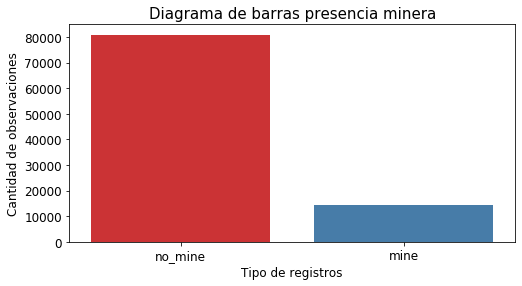

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(x='Type', data=dataF, palette="Set1")
ax.set_title("Diagrama de barras presencia minera", size=15)
ax.set_xlabel('Tipo de registros', size = 12)
ax.set_ylabel('Cantidad de observaciones',  size = 12)
ax.tick_params(labelsize = 12)

dataF[categoria].describe()

dataF.describe()

### Comparación por variables con respecto a la variable objetivo

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


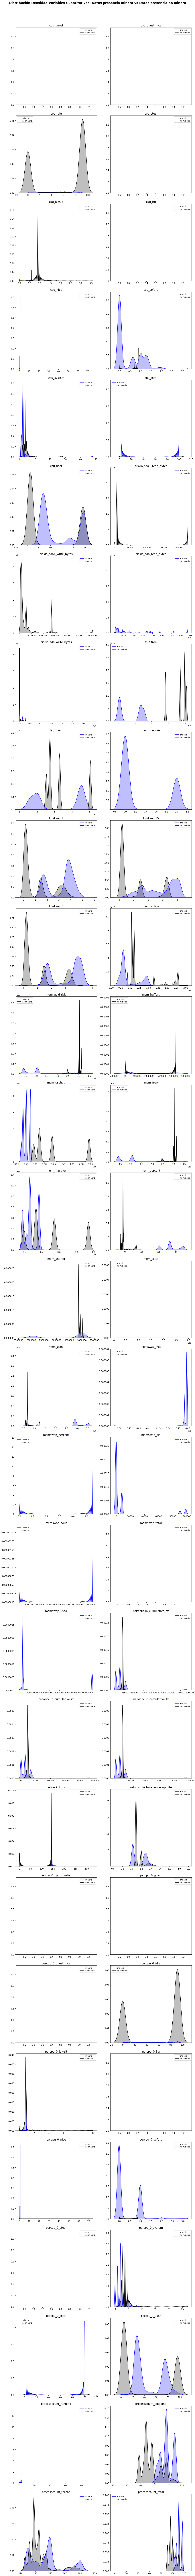

In [14]:
fig, ax = plt.subplots(nrows = 29, ncols = 2, figsize = (15,200))
ax = ax.flat
for i, col in enumerate(numerico):
    sns.kdeplot(dataA[col], color='blue', shade=True, ax = ax[i], label = "mineria")
    sns.kdeplot(dataN[col], color='black', shade=True, ax = ax[i], label = "no mineria")
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("", size=9)
    ax[i].legend()

fig.tight_layout()
plt.subplots_adjust(top = 0.97)
fig.suptitle('Distribución Densidad Variables Cuantitativas: Datos presencia minera vs Datos presencia no minera', fontsize = 17, fontweight = "bold");

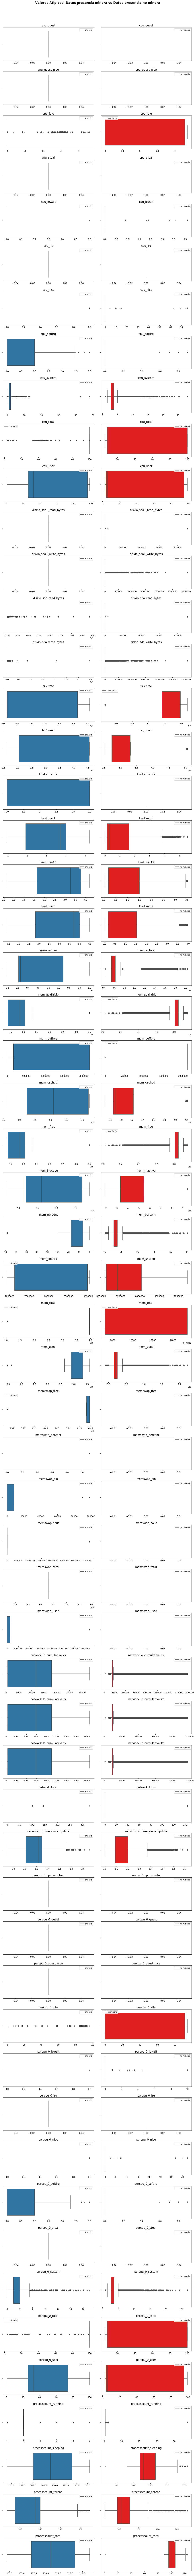

In [15]:
fig, ax = plt.subplots(nrows = 58, ncols = 2, figsize = (15,200))
ax = ax.flat
a = 0
b = 1
for i, col in enumerate(numerico):
    if i > 0: 
        a = a+1
        b = b+1
    
    sns.boxplot(x = dataA[col], ax = ax[i+a])
    sns.boxplot(x = dataN[col], color = 'red', ax = ax[i+b])
    ax[i+a].legend(["mineria"])
    ax[i+a].set_title(col, size = 15)
    ax[i+a].tick_params(labelsize = 12)
    ax[i+a].set_xlabel("", size=9)
    ax[i+b].set_title(col, size = 15)
    ax[i+b].tick_params(labelsize = 12)
    ax[i+b].set_xlabel("", size=9)
    ax[i+b].legend(["no mineria"])
    

fig.tight_layout()
plt.subplots_adjust(top = 0.97)
fig.suptitle('Valores Atipicos: Datos presencia minera vs Datos presencia no minera', fontsize = 17, fontweight = "bold");

cpu_idle: Tiempo en que un procesado esta inactivo
cpu_iowait es la medida del tiempo que los procesos de la CPU pasan sin hacer nada, en espera de poder hacer una operación de IO, es decir, leer o escribir en el disco.
cpu_nice tiempo de CPU que está actualmente "en uso"
cpu_total

In [16]:
dasd

NameError: name 'dasd' is not defined

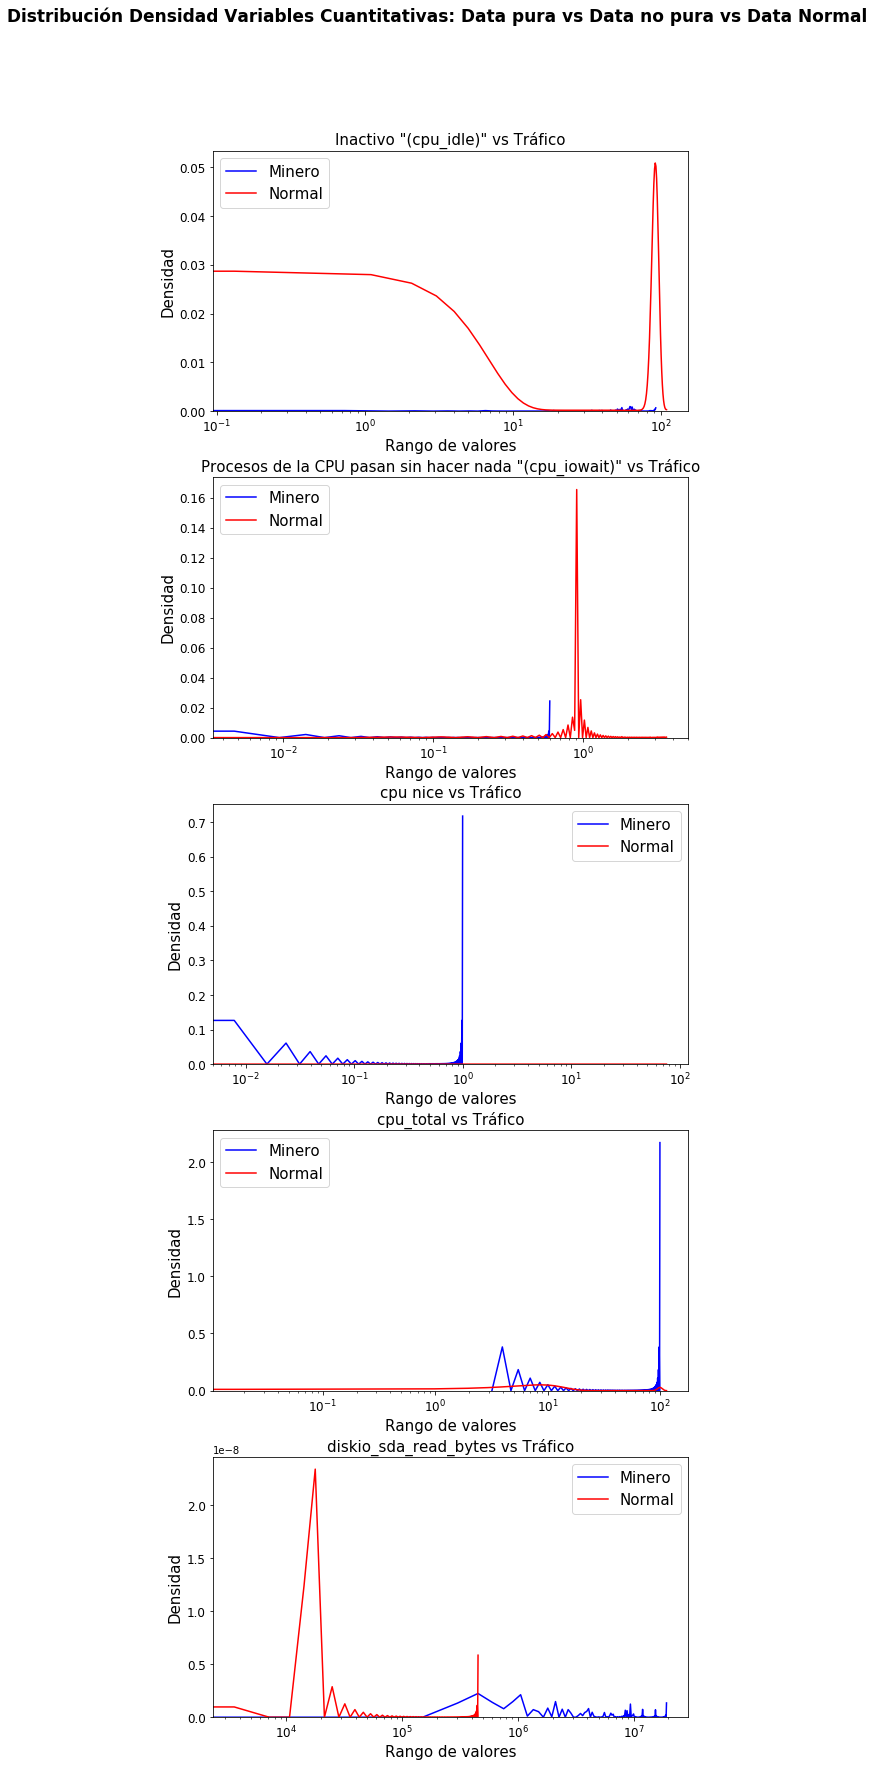

In [21]:
best_feature_pure = ['cpu_idle','cpu_iowait','cpu_nice','cpu_total','diskio_sda_read_bytes']
names = ['Inactivo "(cpu_idle)"', 'Procesos de la CPU pasan sin hacer nada "(cpu_iowait)"','cpu nice','cpu_total', 'diskio_sda_read_bytes']

fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (8,25))
ax = ax.flat
for i, col in enumerate(best_feature_pure):
    sns.kdeplot(dataA[col], color='blue', shade=False, ax = ax[i], label = "Minero")
    sns.kdeplot(dataN[col], color='red', shade=False, ax = ax[i], label = "Normal")
   
    ax[i].set_title(f'{names[i]} vs Tráfico', size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("Rango de valores", fontsize=15)
    ax[i].set_ylabel("Densidad",fontsize=15)
    ax[i].legend(fontsize = 15)
    ax[i].set(xscale="log")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.90)
fig.suptitle('Distribución Densidad Variables Cuantitativas: Data pura vs Data no pura vs Data Normal', fontsize = 17, fontweight = "bold");
